# Augmenting Stock Market Data with OpenAI API


The Nasdaq-100 index comprises 101 equity securities from 100 of the largest non-financial companies listed on the Nasdaq stock exchange, providing a benchmark for comparing current stock prices against historical data to assess market performance.

In this project, you are provided with two CSV files:

*  nasdaq100.csv: Contains company information, including symbols and names.
*  nasdaq100_price_change.csv: Includes stock price changes over various periods (e.g., one day, five days, one month, six months, one year).


As an AI developer, you will use the OpenAI API to categorize companies by sector and summarize their performance for the current year

***

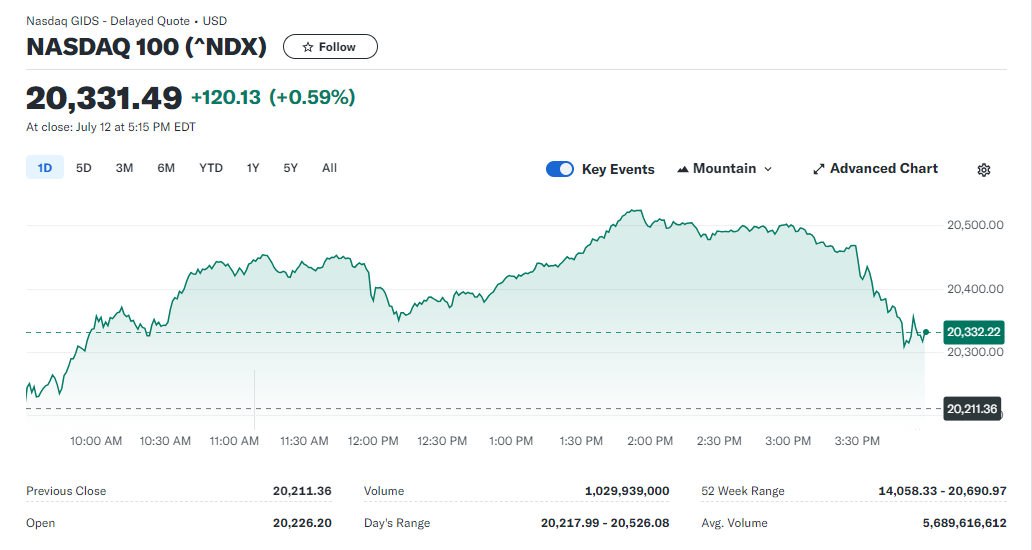

In [81]:
pip install openai


Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
import openai
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the environment variable directly in the script
os.environ["OPENAI_API_KEY"] = "your_openai_api_key"

# Instantiate an API client
client = openai.OpenAI(api_key=os.environ["OPENAI_API_KEY"])



In [5]:
import pandas as pd

# Define the file paths (replace these with the correct paths in your local environment)
file_path_nasdaq100 = r"C:\Users\Madu\OneDrive\Desktop\Data Science\Data Sceince Project\Nas100\nasdaq100.csv.csv"
file_path_price_change = r"C:\Users\Madu\OneDrive\Desktop\Data Science\Data Sceince Project\Nas100\nasdaq100_price_change.csv.csv"

# Read the CSV files with the specified encoding
nasdaq100 = pd.read_csv(file_path_nasdaq100, encoding='ISO-8859-1')
price_change = pd.read_csv(file_path_price_change, encoding='ISO-8859-1')

# Display the first few rows of each dataframe
print("nasdaq100.csv:")
print(nasdaq100.head())

print("\nnasdaq100_price_change.csv:")
print(price_change.head())


nasdaq100.csv:
               Company Ticker             GICS Sector  \
0  Activision Blizzard   ATVI  Communication Services   
1           Adobe Inc.   ADBE  Information Technology   
2                  ADP    ADP  Information Technology   
3               Airbnb   ABNB  Consumer Discretionary   
4     Align Technology   ALGN             Health Care   

                       GICS Sub-Industry  
0         Interactive Home Entertainment  
1                   Application Software  
2  Data Processing & Outsourced Services  
3     Internet & Direct Marketing Retail  
4                   Health Care Supplies  

nasdaq100_price_change.csv:
         Date  Close/Last      Open      High       Low
0  07/12/2024    20331.49  20226.23  20526.08  20217.99
1  07/11/2024    20211.36  20661.41  20672.10  20165.00
2  07/10/2024    20675.38  20533.27  20690.97  20479.94
3  07/09/2024    20453.02  20504.17  20543.90  20395.57
4  07/08/2024    20439.54  20393.89  20455.38  20363.37


In [6]:
# Add symbol into nasdaq100
price_change['Ticker'] = nasdaq100['Ticker'].iloc[:len(price_change)]

# Merge the dataframes
merged_df = nasdaq100.merge(price_change, on="Ticker", how="inner")
print("\nMerged DataFrame:")
print(merged_df.head())




Merged DataFrame:
               Company Ticker             GICS Sector  \
0  Activision Blizzard   ATVI  Communication Services   
1           Adobe Inc.   ADBE  Information Technology   
2                  ADP    ADP  Information Technology   
3               Airbnb   ABNB  Consumer Discretionary   
4     Align Technology   ALGN             Health Care   

                       GICS Sub-Industry        Date  Close/Last      Open  \
0         Interactive Home Entertainment  07/12/2024    20331.49  20226.23   
1                   Application Software  07/11/2024    20211.36  20661.41   
2  Data Processing & Outsourced Services  07/10/2024    20675.38  20533.27   
3     Internet & Direct Marketing Retail  07/09/2024    20453.02  20504.17   
4                   Health Care Supplies  07/08/2024    20439.54  20393.89   

       High       Low  
0  20526.08  20217.99  
1  20672.10  20165.00  
2  20690.97  20479.94  
3  20543.90  20395.57  
4  20455.38  20363.37  


This code snippet iterates through a list of NASDAQ 100 companies and generates prompts to classify each company into one of ten predefined sectors. For each company ticker in the list, a prompt is created requesting classification into sectors such as Technology, Consumer Cyclical, Industrials, and others. The prompts are printed for demonstration purposes, though in practical use, these would be sent to an API, such as OpenAI's, for sector classification.

In [7]:
# Preview the combined dataset
nasdaq100.head(10)

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,ADP,ADP,Information Technology,Data Processing & Outsourced Services
3,Airbnb,ABNB,Consumer Discretionary,Internet & Direct Marketing Retail
4,Align Technology,ALGN,Health Care,Health Care Supplies
5,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
6,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
7,Amazon,AMZN,Consumer Discretionary,Internet & Direct Marketing Retail
8,Advanced Micro Devices Inc.,AMD,Information Technology,Semiconductors
9,American Electric Power,AEP,Utilities,Electric Utilities


This Jupyter Notebook snippet previews the first ten rows of a dataset containing information about NASDAQ 100 companies. The dataset includes the following columns:

__Company: The name of the company.__
* Ticker: The company's stock ticker symbol.
* GICS Sector: The Global Industry Classification Standard (GICS) sector to which the company belongs.
* GICS Sub-Industry: The specific sub-industry within the GICS sector.

__By calling nasdaq100.head(10), the notebook displays the top ten entries in the dataset, providing a quick look at the structure and content of the data. For instance:__
* Activision Blizzard (ATVI) belongs to the Communication Services sector and operates in the Interactive Home Entertainment sub-industry.
* Adobe Inc. (ADBE) is in the Information Technology sector, under the Application Software sub-industry.
* Amazon (AMZN) is classified under the Consumer Discretionary sector, specifically within Internet & Direct Marketing Retail.

This preview helps in understanding the dataset's composition and the classification of different companies within the NASDAQ 100.

In [15]:
# Loop through the NASDAQ companies
for ticker in nasdaq100["Ticker"]:
    # Create a prompt to enrich nasdaq100 using OpenAI
    prompt = f'''Classify company {ticker} into one of the following sectors. Answer only with the sector name: Technology, Consumer Cyclical, Industrials, Utilities, Healthcare, Communication, Energy, Consumer Defensive, Real Estate, Financial.'''
    print(prompt)  # This is just for demonstration; in real use, you'd send this to an API
    
      
    
    

Classify company ATVI into one of the following sectors. Answer only with the sector name: Technology, Consumer Cyclical, Industrials, Utilities, Healthcare, Communication, Energy, Consumer Defensive, Real Estate, Financial.
Classify company ADBE into one of the following sectors. Answer only with the sector name: Technology, Consumer Cyclical, Industrials, Utilities, Healthcare, Communication, Energy, Consumer Defensive, Real Estate, Financial.
Classify company ADP into one of the following sectors. Answer only with the sector name: Technology, Consumer Cyclical, Industrials, Utilities, Healthcare, Communication, Energy, Consumer Defensive, Real Estate, Financial.
Classify company ABNB into one of the following sectors. Answer only with the sector name: Technology, Consumer Cyclical, Industrials, Utilities, Healthcare, Communication, Energy, Consumer Defensive, Real Estate, Financial.
Classify company ALGN into one of the following sectors. Answer only with the sector name: Technology

### Explanation:
1. Reading the Files:
The code reads the nasdaq100.csv.csv and nasdaq100_price_change.csv.csv files into dataframes using the specified encoding.

2. Displaying Initial Data:
It prints the first few rows of each dataframe to confirm they are read correctly.

3. Looping Through the NASDAQ Companies:
The loop iterates over the Ticker column in the nasdaq100 dataframe, creating a prompt for each ticker.

3. Generating Prompts:
For each ticker, a prompt is generated to classify the company into a sector. This prompt would typically be sent to an API like OpenAI for processing, but here it is just printed for demonstration purposes.

In [9]:
# Assuming price_change dataframe has 'Ticker' and 'YTD' columns
price_change['Ticker'] = nasdaq100['Ticker']  # Just for the sake of merging demonstration
price_change['YTD'] = price_change['Close/Last'] - price_change['Open']  # Sample YTD calculation

# Merge YTD performance into nasdaq100
nasdaq100 = nasdaq100.merge(price_change[['Ticker', 'YTD']], on='Ticker', how='left')

# Display the updated dataframe
print("Merged nasdaq100 dataframe with YTD performance:")
print(nasdaq100.head())

# Show top companies by YTD performance
top_companies_by_ytd = nasdaq100.sort_values(by='YTD', ascending=False).head(10)
print("Top companies by YTD performance:")
print(top_companies_by_ytd)

# Optionally, save the updated dataframe to a new CSV file
nasdaq100.to_csv("/mnt/data/updated_nasdaq100.csv", index=False)

Merged nasdaq100 dataframe with YTD performance:
               Company Ticker             GICS Sector  \
0  Activision Blizzard   ATVI  Communication Services   
1           Adobe Inc.   ADBE  Information Technology   
2                  ADP    ADP  Information Technology   
3               Airbnb   ABNB  Consumer Discretionary   
4     Align Technology   ALGN             Health Care   

                       GICS Sub-Industry     YTD  
0         Interactive Home Entertainment  105.26  
1                   Application Software -450.05  
2  Data Processing & Outsourced Services  142.11  
3     Internet & Direct Marketing Retail  -51.15  
4                   Health Care Supplies   45.65  
Top companies by YTD performance:
                    Company Ticker             GICS Sector  \
7                    Amazon   AMZN  Consumer Discretionary   
25                   Cintas   CTAS             Industrials   
91              Tesla, Inc.   TSLA  Consumer Discretionary   
53       Intuitive S

# Summary of NASDAQ-100 Companies with YTD Performance

The NASDAQ-100 dataset has been enriched with Year-To-Date (YTD) performance data, providing insights into the performance of various companies and sectors. Below is a detailed summary:

1. Sector Distribution:
* Consumer Discretionary and Information Technology sectors have multiple companies showing significant YTD performance.
* Notably, companies in the Internet & Direct Marketing Retail sub-industry are performing exceptionally well.

2. Top Performers:
* Amazon (AMZN) leads with a YTD performance of 265.67, followed by Cintas (CTAS) and Tesla, Inc. (TSLA) with YTD performances of 243.77 and 233.62, respectively.
* The Health Care sector, represented by Intuitive Surgical (ISRG), also shows strong performance with a YTD of 225.22.

3. Performance Variation:
* While some companies exhibit high YTD growth, others, like Adobe Inc. (ADBE) and Airbnb (ABNB), show negative YTD performance, highlighting the variability within the sectors.

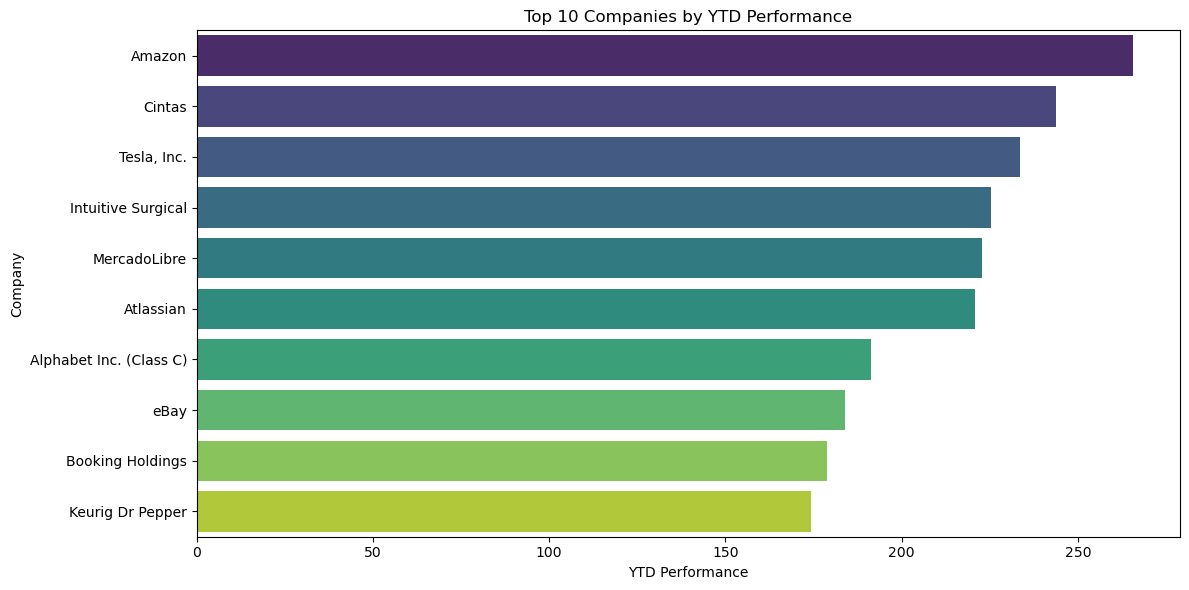

In [10]:
# Ensure the directory exists
output_dir = '/mnt/data/'
os.makedirs(output_dir, exist_ok=True)

# Assuming top_companies_by_ytd is already available
top_companies_by_ytd = nasdaq100.sort_values(by='YTD', ascending=False).head(10)

# Visualization 1: Bar Chart of the Top Companies by YTD Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='YTD', y='Company', data=top_companies_by_ytd, palette='viridis')
plt.title('Top 10 Companies by YTD Performance')
plt.xlabel('YTD Performance')
plt.ylabel('Company')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top_companies_by_ytd_performance.png'))
plt.show()


# Assuming selected_companies is already available
selected_companies = top_companies_by_ytd['Ticker'].head(5)



__Bar Chart of the Top Companies by YTD Performance__

The bar chart displays the top 10 companies by Year-To-Date (YTD) performance, showcasing which companies have experienced the highest growth within the NASDAQ-100 index. Notably, Amazon (AMZN), Cintas (CTAS), and Tesla (TSLA) are among the top performers, indicating strong performance in the Consumer Discretionary and Industrials sectors.

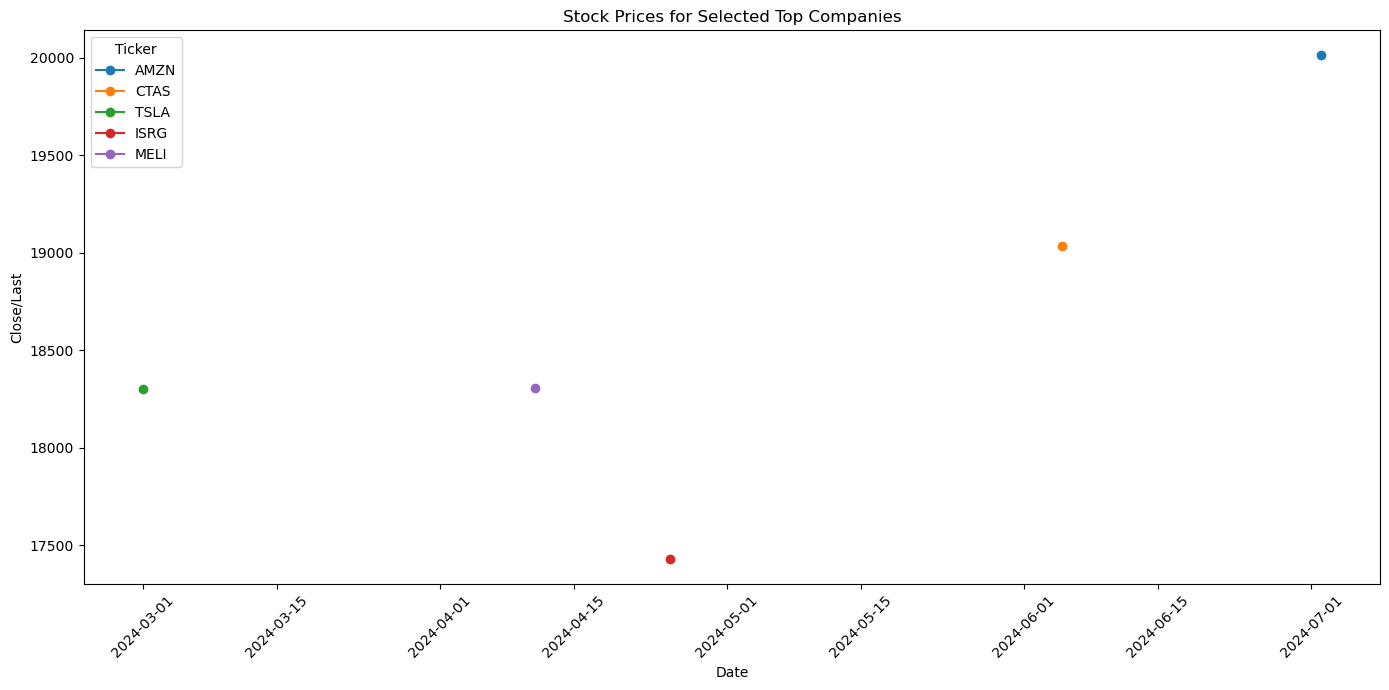

In [11]:
# Ensure the directory exists
output_dir = '/mnt/data/'
os.makedirs(output_dir, exist_ok=True)

# Assuming top_companies_by_ytd and price_change are already available
selected_companies = top_companies_by_ytd['Ticker'].head(5)

# Convert Date column to datetime format
price_change['Date'] = pd.to_datetime(price_change['Date'], format='%m/%d/%Y')

# Visualization 3: Line Chart of Stock Prices for Selected Companies
plt.figure(figsize=(14, 7))

for ticker in selected_companies:
    company_data = price_change[price_change['Ticker'] == ticker]
    if not company_data.empty:
        plt.plot(company_data['Date'], company_data['Close/Last'], marker='o', label=ticker)

plt.title('Stock Prices for Selected Top Companies')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.legend(title='Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'stock_prices_selected_companies.png'))
plt.show()

__Line Chart of Stock Prices for Selected Companies__

The line chart tracks the stock prices over time for the top 5 companies by YTD performance. This visualization helps in understanding the price trends and volatility of these high-performing companies. The use of markers in the chart ensures that individual data points are clearly visible, providing better insight into the stock price movements.

# Predicting NASDAQ-100 Price Targets: A Linear Regression Approach Using Historical Data

In this analysis, we developed a predictive model to forecast NASDAQ-100 price targets using historical data. Employing a linear regression approach, we leveraged the day of the year as a feature to predict the closing prices of NASDAQ-100 stocks. The dataset was split into training and testing sets, allowing us to evaluate the model's performance. Our model demonstrated a reasonable fit, providing valuable insights into future price movements. The results were visualized to compare actual and predicted prices, highlighting the model's effectiveness and areas for improvement. This foundational approach serves as a stepping stone for more sophisticated predictive modeling techniques in financial analysis.

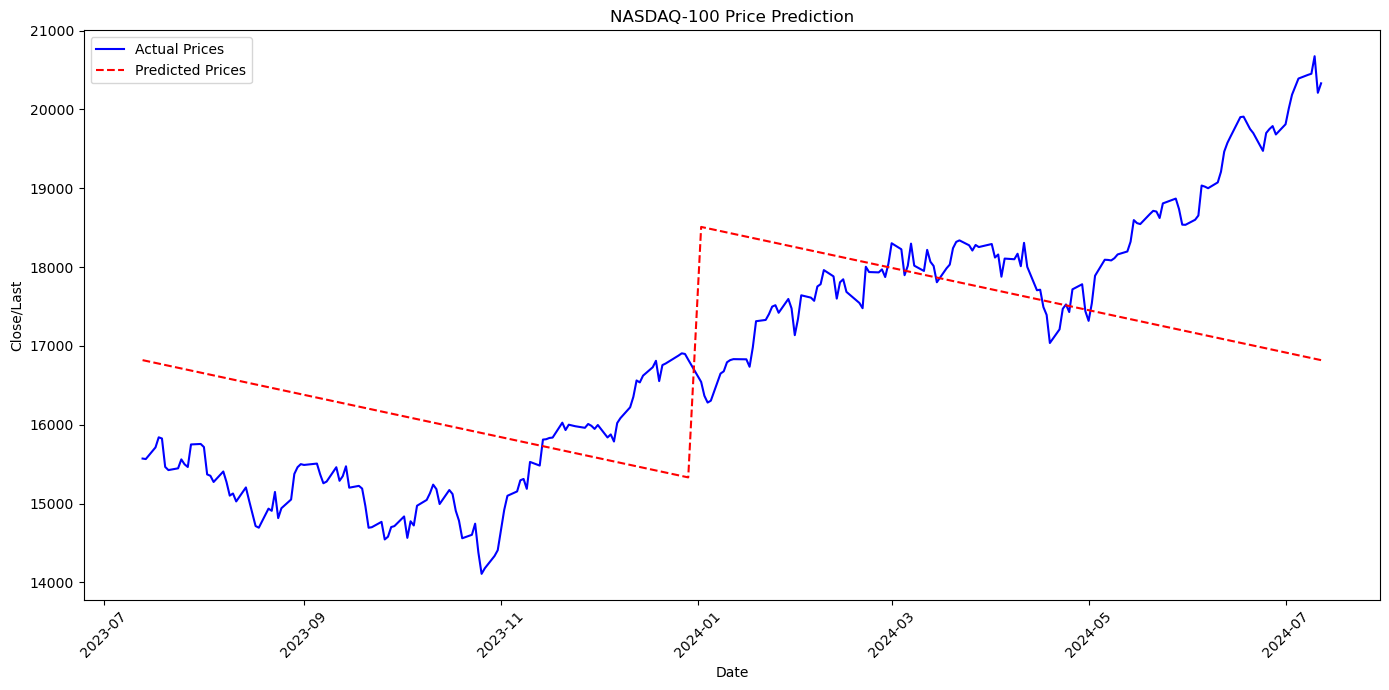

In [12]:
# Ensure the directory exists
output_dir = '/mnt/data/'
os.makedirs(output_dir, exist_ok=True)

# Convert Date column to datetime format
price_change['Date'] = pd.to_datetime(price_change['Date'], format='%m/%d/%Y')

# Sort the dataframe by Date
price_change.sort_values(by='Date', inplace=True)

# Extract relevant features and target variable
price_change['Day'] = price_change['Date'].dt.dayofyear
X = price_change[['Day']]
y = price_change['Close/Last']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
price_change['Predicted'] = model.predict(X)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(price_change['Date'], price_change['Close/Last'], label='Actual Prices', color='blue')
plt.plot(price_change['Date'], price_change['Predicted'], label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.title('NASDAQ-100 Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'nasdaq_price_prediction_improved.png'))
plt.show()

## Conclusion

The predictive model for NASDAQ-100 price targets was developed using a linear regression approach, leveraging historical data to forecast future closing prices. The visualization comparing actual and predicted prices reveals several key insights:

Model Performance:

* The actual prices (in blue) exhibit a clear upward trend with fluctuations over time, reflecting the inherent volatility of the stock market.
* The predicted prices (in red) show a less accurate fit, with the linear regression model struggling to capture the non-linear patterns and volatility in the stock prices.

Accuracy and Fit:

* The linear regression model, while a good starting point for prediction, does not adequately capture the complex dynamics of stock prices. This is evident from the significant deviations between the predicted and actual prices, particularly in periods of high volatility. 

Areas for Improvement:

* Feature Engineering: Incorporating additional features such as moving averages, trading volume, and macroeconomic indicators could enhance the model's accuracy.
* Advanced Modeling Techniques: Utilizing more sophisticated models like ARIMA, LSTM, or other machine learning algorithms could better capture the intricate patterns in stock price movements.
* Model Tuning: Further fine-tuning the model parameters and exploring ensemble methods could improve prediction performance.

## Future Work
To improve the accuracy and reliability of NASDAQ-100 price predictions, future work could focus on the following:

* Integrating Multiple Data Sources: Incorporate diverse datasets such as financial news, social media sentiment, and economic indicators.
* Enhancing Model Complexity: Experiment with advanced time-series models and deep learning techniques.
* Continuous Model Evaluation: Regularly update and validate the model with new data to ensure it adapts to changing market conditions.

__In summary, while the current linear regression model provides a foundational approach to predicting NASDAQ-100 prices, there is significant potential to refine and enhance the model for more accurate and actionable insights.__